D:/Dog\0.jpg


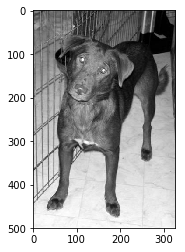

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "D:/"
CATEGORIES = ["Dog","Cat"]


for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        print(os.path.join(path,img))
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

In [43]:
print(img_array.shape)

(500, 327)


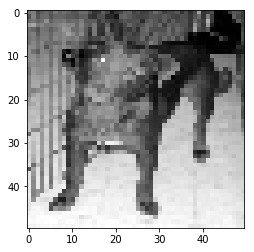

In [44]:
IMG_SIZE = 50
 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [45]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [46]:
print(len(training_data))

24947


In [47]:
import random

random.shuffle(training_data)

In [48]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
1
1
0
0
0


In [49]:
X = []
y = []

In [50]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 50, 50, 1)

In [51]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [52]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [53]:
X[0]

array([[[201],
        [149],
        [179],
        ...,
        [187],
        [174],
        [175]],

       [[235],
        [161],
        [167],
        ...,
        [178],
        [166],
        [194]],

       [[230],
        [167],
        [156],
        ...,
        [177],
        [179],
        [196]],

       ...,

       [[184],
        [222],
        [178],
        ...,
        [169],
        [148],
        [138]],

       [[132],
        [174],
        [194],
        ...,
        [217],
        [144],
        [123]],

       [[172],
        [173],
        [185],
        ...,
        [201],
        [201],
        [167]]], dtype=uint8)

In [54]:
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [55]:
y[0]

0